In [ ]:
#resources
#https://www.dataquest.io/blog/free-datasets-for-projects/

In [3]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import json

# Import API key
from config import yelp_api_key
from config import open_weather_api_key



In [4]:
# Save file path to variable
csv_path = "City_demographics - Sheet1.csv"
# Read with Pandas
Cities_data_df = pd.read_csv(csv_path)
Cities_data_df.head()



,City,Census 2010 Total Population,"2018 Population Estimate (as of July 1, 2018)",2017 ACS 5-Year Population Estimate,Median Age,Number of Companies,Educational Attainment: Percent high school graduate or higher,Total housing units,Median Household Income,Foreign Born Population,...,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two or More Races,Hispanic or Latino (of any race),"White alone, Not Hispanic or Latino",Veterans
0,New York,"8,175,133","8,398,748","8,560,072",36.2,"1,050,911",81.10%,"3,455,117","57,782","3,180,098",...,"3,661,800","2,081,507","34,487","1,198,334","4,358","1,294,497","285,089","2,491,496","2,747,159","163,465"
1,Los Angeles,"9,818,605","10,105,518","10,105,722",36.0,"1,146,701",78.20%,"3,506,903","61,015","3,478,879",...,"5,232,835","828,981","68,211","1,460,508","27,691","2,101,084","386,412","4,893,579","2,676,982","280,109"
2,Chicago,"2,695,598","2,705,994","2,722,586",34.1,"291,007",83.80%,"1,200,305","52,497","563,879",...,"1,337,911","830,626","7,723","169,458",841,"304,527","71,500","789,713","890,322","75,405"
3,Houston,"4,092,459","4,698,619","4,525,519",33.1,"438,793",80.50%,"1,714,340","57,791","1,174,879",...,"2,864,288","857,122","19,465","309,400","3,091","368,849","103,304","1,910,535","1,386,576","163,317"
4,Phoenix,"1,445,632","1,660,272","1,574,421",33.3,"124,033",81.20%,"608,384","52,080","308,744",...,"1,131,958","108,846","31,543","57,211","3,192","184,145","57,526","668,376","682,354","72,364"


In [5]:
#base url
url = (f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={open_weather_api_key}')

In [6]:
# Create lists to append the API data
#later base list off of table and not a hard coded list
cities= ['New York','Los Angeles',
'Chicago','Houston',
'Phoenix','Philadelphia',
'San Antonio','San Diego',
'Dallas','San Jose',
'Austin','Jacksonville',
'Fort Worth','Columbus',
'San Francisco','Charlotte',
'Indianapolis','Seattle',
'Denver',
'Washington DC.']

country_code = 'US'


# Start the call counter 
record = 1

In [7]:
print(cities)
print(country_code)

['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose', 'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'San Francisco', 'Charlotte', 'Indianapolis', 'Seattle', 'Denver', 'Washington DC.']
US


In [8]:
# Create lists to append the API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print("Beginning Data Retrieval")
print("-------------------------------")

#Create for loop to loop through all cities
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city},{country_code}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Setting timer to not over exceed rate limit of API
        #https://openweathermap.org/guide
        #Free tariff The number of calls you are allowed to make depends on the subscription plan you choose. 
        #Free users can make 60 requests per minute. Using the service under Free tier, 
        #you can work with the following weather APIs:
        time.sleep(1.5)
        
    # If no record found "skip" to next call
    except:
        print("----City not found, Moving on----")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | New York
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aab3ee6dfef02dc1735226ee59218ce0&q=New York
----City not found, Moving on----
Processing Record 2 | Los Angeles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aab3ee6dfef02dc1735226ee59218ce0&q=Los Angeles
----City not found, Moving on----
Processing Record 3 | Chicago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aab3ee6dfef02dc1735226ee59218ce0&q=Chicago
----City not found, Moving on----
Processing Record 4 | Houston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aab3ee6dfef02dc1735226ee59218ce0&q=Houston
----City not found, Moving on----
Processing Record 5 | Phoenix
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aab3ee6dfef02dc1735226ee59218ce0&q=Phoenix
----City not found, Moving on----
Processing Record 6 | Philadelphia
http://api.openweatherm

In [9]:
print(response
     )

{'coord': {'lon': -77.04, 'lat': 38.9}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 73.62, 'pressure': 1019, 'humidity': 94, 'temp_min': 71.6, 'temp_max': 75.99}, 'visibility': 16093, 'wind': {'speed': 6.44, 'deg': 162.937}, 'clouds': {'all': 20}, 'dt': 1562299540, 'sys': {'type': 1, 'id': 3231, 'message': 0.0131, 'country': 'US', 'sunrise': 1562320099, 'sunset': 1562373405}, 'timezone': -14400, 'id': 4366164, 'name': 'Washington DC.', 'cod': 200}


In [10]:
#Create dict for dataframe
Weather_dict = {"City" : city_name,
            "Latitude" : lat,
            "Longitude" : lng,
            "Max Temp" : max_temp,
            "Wind Speed" : wind_speed,   
            "Cloudiness" : cloudiness,
            "County": country,
            "Date" : date,
            "Humidity" : humidity}

In [11]:
#Create DF "Weather_data_df"
Weather_data_df = pd.DataFrame(Weather_dict)
Weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Wind Speed,Cloudiness,County,Date,Humidity
0,New York,40.73,-73.99,75.99,4.70,75,US,1562299817,88
1,Los Angeles,34.05,-118.24,70.00,8.05,40,US,1562299637,72
2,Chicago,41.88,-87.62,80.60,5.35,1,US,1562299628,83
3,Houston,29.76,-95.37,82.99,11.18,1,US,1562299601,83
4,Phoenix,33.45,-112.08,98.60,8.05,1,US,1562299687,12


In [12]:
citi_weather=Weather_data_df[["City","Max Temp"]]
citi_weather.head()

,City,Max Temp
0,New York,75.99
1,Los Angeles,70.00
2,Chicago,80.60
3,Houston,82.99
4,Phoenix,98.60


In [13]:
citi_population=Cities_data_df[["City","2018 Population Estimate (as of July 1, 2018)"]]
citi_population.head()


,City,"2018 Population Estimate (as of July 1, 2018)"
0,New York,"8,398,748"
1,Los Angeles,"10,105,518"
2,Chicago,"2,705,994"
3,Houston,"4,698,619"
4,Phoenix,"1,660,272"


In [14]:
population_tem = pd.merge(citi_weather, citi_population, on="City")
population_tem.head()
population_tem_rename=population_tem.rename(columns={"2018 Population Estimate (as of July 1, 2018)":"population(2018)"})
population_tem_rename.head()


,City,Max Temp,population(2018)
0,New York,75.99,"8,398,748"
1,Los Angeles,70.00,"10,105,518"
2,Chicago,80.60,"2,705,994"
3,Houston,82.99,"4,698,619"
4,Phoenix,98.60,"1,660,272"


In [15]:
#x_axis=population_tem["City"]
#y_axis=population_tem["Max Temp"]
#plt.bar(x_axis, y_axis, color='r', alpha=0.7, align="center")

#plt.bar(City, Max Temp, color='r',alpha= 0.5, align='center')

In [16]:
x_axis = np.arange(len(population_tem))
tick_locations = [value for value in x_axis]

<IPython.core.display.Javascript object>


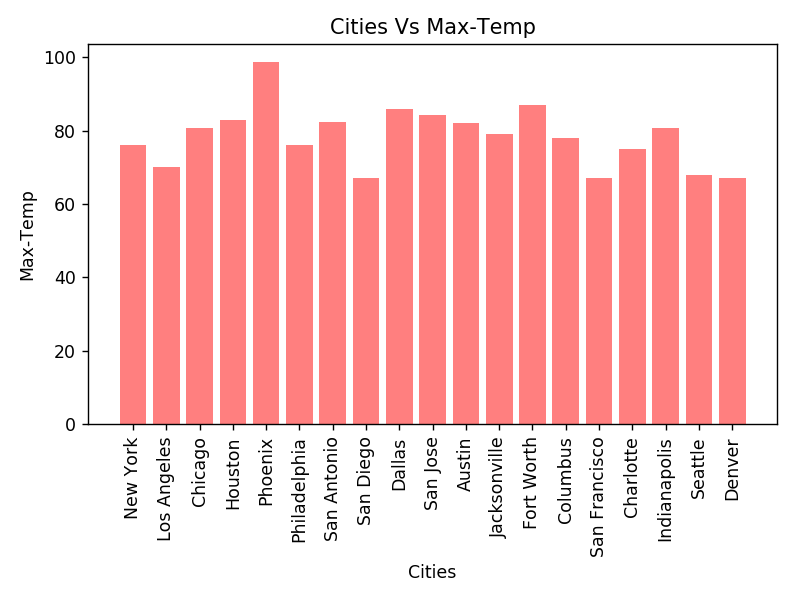

In [17]:
# Create a list indicating where to write x labels and set figure size to adjust for space
#plt.figure(figsize=(20,5))
plt.bar(x_axis, population_tem["Max Temp"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, population_tem["City"], rotation="vertical")
plt.title("Cities Vs Max-Temp")
plt.xlabel("Cities")
plt.ylabel("Max-Temp")
plt.tight_layout()
plt.show()

In [18]:
#plt.bar(population_tem_rename["City"], population_tem_rename["population(2018)"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, population_tem["City"], rotation="vertical")
#plt.title("Cities Vs Max-Temp")
#plt.xlabel("Cities")
#plt.ylabel("Max-Temp")
#plt.tight_layout()
#plt.show()

In [19]:
#population_count=population_tem_rename["population(2018)"]
population_count_df=population_tem_rename["population(2018)"].sum()
population_count_df

'8,398,74810,105,5182,705,9944,698,6191,660,2721,584,1381,532,2331,425,9762,637,7721,030,119964,254903,889895,008892,533883,305872,498867,125744,955716,492'

<IPython.core.display.Javascript object>


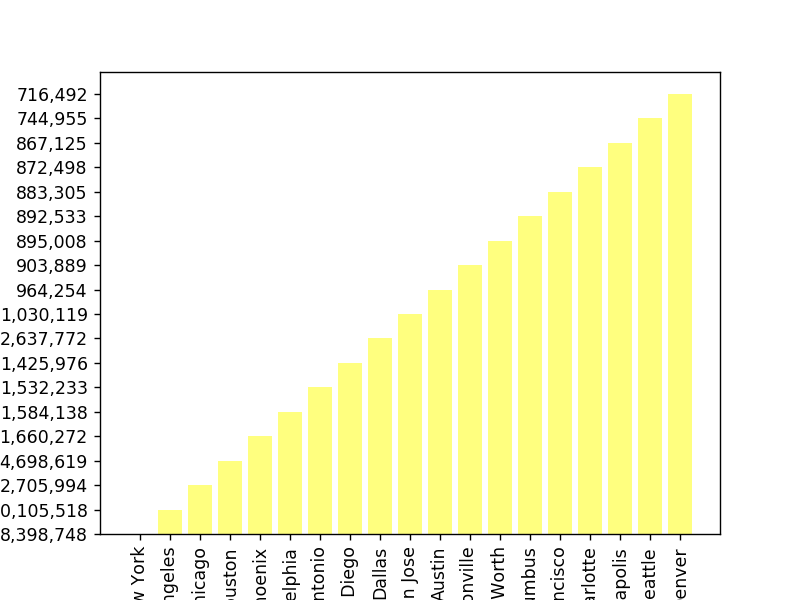

([<matplotlib.axis.XTick at 0x14cd7a3a9b0>,
 <a list of 19 Text xticklabel objects>)

In [32]:
#x_axis = np.arange(len(population_tem))
#tick_locations = [value for value in x_axis]
#plt.bar(population_tem_rename["City"], population_tem_rename["population(2018)"], color='yellow', alpha=0.5, align="center")
#plt.xticks(tick_locations, population_tem["City"], rotation="vertical")